In [1]:
from scipy import stats
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import seaborn as sns
import pandas as pd
from theano import shared
from sklearn import preprocessing

In C:\Users\THINKPAD\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\THINKPAD\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\THINKPAD\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\THINKPAD\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\THINKPAD\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_c

In [2]:
print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.9.3


In [3]:
data = pd.read_csv('dataset_1.csv')

In [23]:
type(data)
column = data["activityChange"]
print(column.min())

0.007042253521126761


In [6]:
data = data.sample(frac=0.01, random_state=99)

In [7]:
data

,lastSensorEventHours,lastSensorEventSeconds,lastSensorDayOfWeek,windowDuration,timeSinceLastSensorEvent,prevDominantSensor1,prevDominantSensor2,lastSensorID,lastSensorLocation,lastMotionLocation,...,sensorElTime-Chair,sensorElTime-DiningRoom,sensorElTime-Hall,sensorElTime-Ignore,sensorElTime-Kitchen,sensorElTime-LivingRoom,sensorElTime-Office,sensorElTime-OutsideDoor,sensorElTime-WorkArea,activity
44598,15.0,56730.0,6.0,382.0,1.0,7.0,6.0,7.0,7.0,7.0,...,86400.0,1777.091417,86400.0,1.160099,1697.339750,0.000000,86400.0,3660.563844,86400.0,Watch_TV
2757,9.0,34724.0,6.0,368.0,1.0,7.0,7.0,7.0,7.0,7.0,...,86400.0,3842.042445,86400.0,78.554591,3841.298258,0.000000,86400.0,4080.542845,86400.0,Watch_TV
27828,23.0,83952.0,3.0,1213.0,3.0,7.0,5.0,7.0,7.0,7.0,...,86400.0,35022.250108,86400.0,121.507211,13613.787288,0.000000,86400.0,16941.679333,86400.0,Watch_TV
50984,23.0,84402.0,5.0,485.0,2.0,7.0,7.0,5.0,5.0,7.0,...,86400.0,5331.485264,86400.0,0.000000,5332.170416,2.024329,86400.0,8538.184541,86400.0,Watch_TV
8239,9.0,33565.0,2.0,369.0,4.0,7.0,7.0,7.0,7.0,7.0,...,86400.0,3243.159243,86400.0,140.617695,2535.522177,0.000000,86400.0,4439.565904,86400.0,Watch_TV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36177,12.0,46309.0,6.0,469.0,12.0,1.0,1.0,7.0,7.0,7.0,...,86400.0,4817.588750,86400.0,12.774762,4819.501959,0.000000,86400.0,481.408013,86400.0,Watch_TV
8462,10.0,36788.0,2.0,201.0,0.0,7.0,7.0,7.0,7.0,7.0,...,86400.0,6467.058569,86400.0,5.117200,2178.994593,0.000000,86400.0,7663.465230,86400.0,Watch_TV
29408,17.0,62137.0,5.0,631.0,1.0,7.0,7.0,7.0,7.0,7.0,...,86400.0,3602.427353,86400.0,2.979070,410.976627,0.000000,86400.0,3879.972837,86400.0,Watch_TV
592,11.0,40873.0,5.0,129.0,2.0,5.0,5.0,5.0,5.0,7.0,...,86400.0,4199.532439,86400.0,0.000000,3558.691615,2.027473,86400.0,4213.696395,86400.0,Watch_TV


In [8]:
data.head(3)

,lastSensorEventHours,lastSensorEventSeconds,lastSensorDayOfWeek,windowDuration,timeSinceLastSensorEvent,prevDominantSensor1,prevDominantSensor2,lastSensorID,lastSensorLocation,lastMotionLocation,...,sensorElTime-Chair,sensorElTime-DiningRoom,sensorElTime-Hall,sensorElTime-Ignore,sensorElTime-Kitchen,sensorElTime-LivingRoom,sensorElTime-Office,sensorElTime-OutsideDoor,sensorElTime-WorkArea,activity
44598,15.0,56730.0,6.0,382.0,1.0,7.0,6.0,7.0,7.0,7.0,...,86400.0,1777.091417,86400.0,1.160099,1697.339750,0.0,86400.0,3660.563844,86400.0,Watch_TV
2757,9.0,34724.0,6.0,368.0,1.0,7.0,7.0,7.0,7.0,7.0,...,86400.0,3842.042445,86400.0,78.554591,3841.298258,0.0,86400.0,4080.542845,86400.0,Watch_TV
27828,23.0,83952.0,3.0,1213.0,3.0,7.0,5.0,7.0,7.0,7.0,...,86400.0,35022.250108,86400.0,121.507211,13613.787288,0.0,86400.0,16941.679333,86400.0,Watch_TV


In [9]:
data.isnull().sum()/len(data)

lastSensorEventHours        0.0
lastSensorEventSeconds      0.0
lastSensorDayOfWeek         0.0
windowDuration              0.0
timeSinceLastSensorEvent    0.0
prevDominantSensor1         0.0
prevDominantSensor2         0.0
lastSensorID                0.0
lastSensorLocation          0.0
lastMotionLocation          0.0
complexity                  0.0
activityChange              0.0
areaTransitions             0.0
numDistinctSensors          0.0
sensorCount-Bathroom        0.0
sensorCount-Bedroom         0.0
sensorCount-Chair           0.0
sensorCount-DiningRoom      0.0
sensorCount-Hall            0.0
sensorCount-Ignore          0.0
sensorCount-Kitchen         0.0
sensorCount-LivingRoom      0.0
sensorCount-Office          0.0
sensorCount-OutsideDoor     0.0
sensorCount-WorkArea        0.0
sensorElTime-Bathroom       0.0
sensorElTime-Bedroom        0.0
sensorElTime-Chair          0.0
sensorElTime-DiningRoom     0.0
sensorElTime-Hall           0.0
sensorElTime-Ignore         0.0
sensorEl

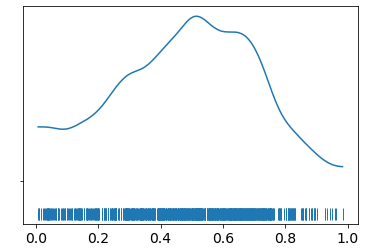

In [18]:
az.plot_kde(data['activityChange'].values, rug=True)
# az.plot_kde(data['activityChange'].values, rug=True)
# az.plot_kde(data['activityChange'].values, rug=True)
# az.plot_kde(data['activityChange'].values, rug=True)
# az.plot_kde(data['activityChange'].values, rug=True)
# az.plot_kde(data['activityChange'].values, rug=True)
# az.plot_kde(data['activityChange'].values, rug=True)
# az.plot_kde(data['activityChange'].values, rug=True)
# az.plot_kde(data['activityChange'].values, rug=True)
# az.plot_kde(data['activityChange'].values, rug=True)
# az.plot_kde(data['activityChange'].values, rug=True)
# az.plot_kde(data['activityChange'].values, rug=True)
# az.plot_kde(data['activityChange'].values, rug=True)
# az.plot_kde(data['activityChange'].values, rug=True)
# az.plot_kde(data['activityChange'].values, rug=True)
# az.plot_kde(data['activityChange'].values, rug=True)
# az.plot_kde(data['activityChange'].values, rug=True)
# az.plot_kde(data['sensorElTime-Office'].values, rug=True)
# az.plot_kde(data['sensorElTime-OutsideDoor'].values, rug=True)
# az.plot_kde(data['sensorElTime-WorkArea'].values, rug=True)
plt.yticks([0], alpha=0);

In [25]:
with pm.Model() as model_g:
    μ = pm.Uniform('μ', lower=0, upper=1)
    σ = pm.HalfNormal('σ', sd=10)
    y = pm.Normal('y', mu=μ, sd=σ, observed=data['activityChange'].values)
    trace_g = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, μ]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 828 seconds.


C:\Users\THINKPAD\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


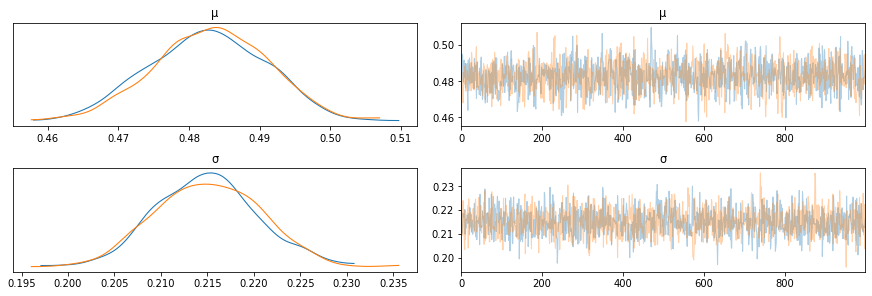

In [26]:
az.plot_trace(trace_g);

In [27]:
az.plot_joint(trace_g, kind='kde', fill_last=False);

C:\Users\THINKPAD\Anaconda3\lib\site-packages\arviz\plots\jointplot.py:149: UserWarning: plot_joint will be deprecated. Please use plot_pair instead.
  warnings.warn("plot_joint will be deprecated. Please use plot_pair instead.")
C:\Users\THINKPAD\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


ValueError: Number of rows must be a positive integer, not 0

<Figure size 432x288 with 0 Axes>

In [28]:
az.summary(trace_g)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
μ,0.483,0.008,0.468,0.498,0.0,0.0,1565.0,1562.0,1547.0,1143.0,1.0
σ,0.215,0.006,0.205,0.225,0.0,0.0,1635.0,1635.0,1636.0,1434.0,1.0


In [31]:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style('whitegrid')
import numpy

from pomegranate import *

numpy.random.seed(0)
numpy.set_printoptions(suppress=True)

%load_ext watermark
%watermark -m -n -p numpy,scipy,pomegranate

Sun Sep 20 2020 

numpy 1.16.5
scipy 1.3.1
pomegranate 0.13.4

compiler   : MSC v.1915 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 78 Stepping 3, GenuineIntel
CPU cores  : 4
interpreter: 64bit


In [ ]:

# The guests initial door selection is completely random
guest = DiscreteDistribution({'A': 1./3, 'B': 1./3, 'C': 1./3})

# The door the prize is behind is also completely random
prize = DiscreteDistribution({'A': 1./3, 'B': 1./3, 'C': 1./3})

    # Monty is dependent on both the guest and the prize. 
monty = ConditionalProbabilityTable(
        [[ 'A', 'A', 'A', 0.0 ],
         [ 'A', 'A', 'B', 0.5 ],
         [ 'A', 'A', 'C', 0.5 ],
         [ 'A', 'B', 'A', 0.0 ],
         [ 'A', 'B', 'B', 0.0 ],
         [ 'A', 'B', 'C', 1.0 ],
         [ 'A', 'C', 'A', 0.0 ],
         [ 'A', 'C', 'B', 1.0 ],
         [ 'A', 'C', 'C', 0.0 ],
         [ 'B', 'A', 'A', 0.0 ],
         [ 'B', 'A', 'B', 0.0 ],
         [ 'B', 'A', 'C', 1.0 ],
         [ 'B', 'B', 'A', 0.5 ],
         [ 'B', 'B', 'B', 0.0 ],
         [ 'B', 'B', 'C', 0.5 ],
         [ 'B', 'C', 'A', 1.0 ],
         [ 'B', 'C', 'B', 0.0 ],
         [ 'B', 'C', 'C', 0.0 ],
         [ 'C', 'A', 'A', 0.0 ],
         [ 'C', 'A', 'B', 1.0 ],
         [ 'C', 'A', 'C', 0.0 ],
         [ 'C', 'B', 'A', 1.0 ],
         [ 'C', 'B', 'B', 0.0 ],
         [ 'C', 'B', 'C', 0.0 ],
         [ 'C', 'C', 'A', 0.5 ],
         [ 'C', 'C', 'B', 0.5 ],
         [ 'C', 'C', 'C', 0.0 ]], [guest, prize])